# CS 10-601 HW2

## Problem 1: More probability Review:

### (a)
From Kolmogorov definition of conditional probability, we have 

$$P(A \cap B)=P(A)P(B \mid A)=P(B)P(A \mid B)$$

After rearranging, we can have

$$P(A \mid B) =\frac{P(B \mid A)P(A)}{P(B)}$$


### (b) 

Using Kolmogorov definition of conditional probability twice, we can get

$$\begin{equation}
\begin{split}
P(A,B,C) &= P(A \mid B,C)P(B,C)
         &= P(A \mid B,C)P(B \mid C)P(C)
\end{split}
\end{equation}$$

### (c) 
Using the definition of expected value

$$\begin{equation}
\begin{split}
E\left [ X \right ]&=\sum_{i}P(X=x_i)x_i\\
&=1\cdot P(A)+0\cdot P(\overline{A})\\
&=P(A)
\end{split}
\end{equation}$$

### (d.i) 
No. We can see 

$$P(X = 1) = \frac{1}{15}+\frac{1}{10}+\frac{2}{15}+ \frac{4}{15} = \frac{7}{18}$$,

while

$$P(X = 1 \mid Y = 1) = \frac{P(X = 1 \cap Y = 1)}{P(Y=1)}= \frac{\frac{1}{15}}{\frac{1}{10}+\frac{1}{10}+\frac{8}{45}+\frac{4}{45}}=\frac{1}{7}$$,

$P(X = 1) \neq P(X = 1 \mid Y = 1)$, so they are independent.

### (d.ii) 
Yes. It can be shown that
$$P(X = 0 \mid Z = 0, Y = 0) = P(X = 0 \mid Z = 0, Y = 1) = P(X = 0 \mid Z = 0) = \frac {1} {2}$$
Similarly,
$$P(X = 0 \mid Z = 1, Y = 0) = P(X = 0 \mid Z = 1, Y = 1) = P(X = 0 \mid Z = 1) = \frac {2} {3}$$

### (d.iii)
$$\begin{equation}
\begin{split}
P(X = 0 \mid X+Y > 0) = \frac{5}{12}
\end{split}
\end{equation}$$

## Problem 2: Maximum Likelihood and Maximum Posteriori Estimation:

### (a) 
The formula for likelihood function is as following and it does not depend on the order of the random variables if they are iid

$$\begin{equation}
\begin{split}
\mathit{L}\left ( \hat{\theta}  \right )&=P\left (  X_1...X_n\mid  \hat{\theta}\right ) \\
&=\prod_{i=1}^{n}P\left (  X_i\mid  \hat{\theta}\right ) \\
&= \hat{\theta}^{\left | \left \{ X_i=1 \right \} \right |} \left (1 - \hat{\theta}  \right )^{\left | \left \{ X_i=0 \right \} \right |}\\
\end{split}
\end{equation}$$

### (b) 
The code is as following:

In [38]:
%matplotlib inline

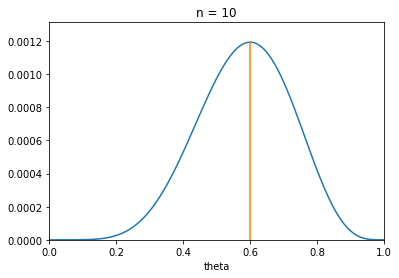

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def binominalMLE(n0, n1, titleString = ''):
    theta = np.linspace(0, 1, 101)
    pdf = theta ** n1 * (1.0 - theta) **n0
    plt.plot(theta, pdf)
    max_theta = theta[np.argmax(pdf)]
    plt.plot([max_theta, max_theta], [min(pdf), max(pdf)])
    plt.xlabel('theta')
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,max(pdf) * 1.1])
    plt.title(titleString)
    plt.show()

binominalMLE(4, 6, 'n = 10')

### (c) 
To obtain the close form of $\hat{\theta}^{MLE}$, we have 
$$\mathit{L}\left ( \hat{\theta}  \right ) = \hat{\theta}^{n_1} \left (1 - \hat{\theta}  \right )^{n_0}$$

Take a natural logrithmic on the expression, it reads
$$ln(\mathit{L}(\hat{\theta}))  = n_1ln\hat{\theta} +n_0ln(1 - \hat{\theta})$$
Let
$$\frac{\partial ln(\mathit{L}(\hat{\theta}))}{\partial \theta} = \frac{n_1}{\hat{\theta}}-\frac{n_0}{1-\hat{\theta}} = 0$$
Therefore, $\hat{\theta}^{MLE} = \frac{n_0}{n_0 + n_1}$

### (d) 
The code is as following:

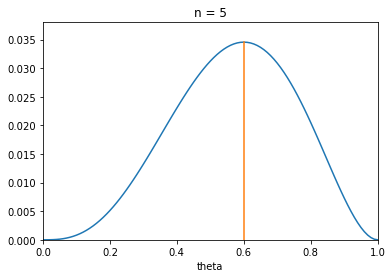

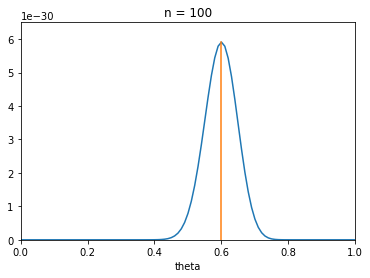

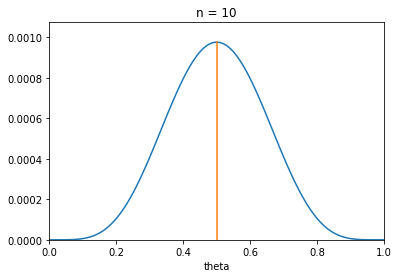

In [42]:
binominalMLE(2, 3, 'n = 5')
binominalMLE(40, 60, 'n = 100')
binominalMLE(5, 5, 'n = 10')

### (e)
The MLE is consistent with the theorectical value $\hat{\theta} = \frac{n_0}{n_0 + n_1}$, and the larger dataset we have, the smaller variance it shows for the likelihood function.

### (f)
The code is as follows

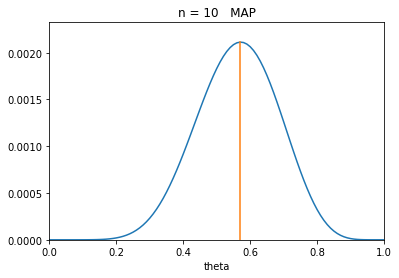

In [55]:
from scipy.special import beta

def binominalMAE(n0, n1, b0, b1, titleString = ''):
    theta = np.linspace(0, 1, 101)
    likelihood = theta ** n1 * (1.0 - theta) ** n0
    prior = theta ** (b1 - 1) * (1.0 - theta) ** (b0 - 1) / beta(b0, b1)
    posterior = likelihood * prior
    plt.plot(theta, posterior)
    max_theta = theta[np.argmax(posterior)]
    plt.plot([max_theta, max_theta], [min(likelihood), max(posterior)])
    plt.xlabel('theta')
    axes = plt.gca()
    axes.set_xlim([0,1])
    axes.set_ylim([0,max(posterior) * 1.1])
    plt.title(titleString)
    plt.show()
    
binominalMAE(4, 6, 3, 3, 'n = 10   MAP')

### (g)

The posteriori distribution is

$$\mathit{L}\left ( \hat{\theta}  \right )p(\hat{\theta}) = \frac{\hat{\theta}^{n_1 + 2} \left (1 - \hat{\theta}  \right )^{n_0 + 2}}{B(3,3)} \propto \hat{\theta}^{n_1 + 2} \left (1 - \hat{\theta}  \right )^{n_0 + 2}$$

By change of variable, we can obtain $\hat{\theta}^{MAP} = \frac{n_0 + 2}{n_0 + n_1 + 4}$

### (h)

$\hat{\theta}^{MAP}$ can be considered as a more general form of $\hat{\theta}^{MLE}$. When there is no prior information of the distribution of $\theta$, $\hat{\theta}^{MAP}$ is reduced to $\hat{\theta}^{MLE}$.

### (f)
When $n \rightarrow \infty$, $\hat{\theta}^{MAP} = \hat{\theta}^{MLE}$, namely the impact of prior information becomes negligible.

## Problem 3: Splitting Heuristic for Decision Trees

### (a)

First notice that the number of data having $x_1 = x_2 = x_3 = 0$ is $2^{n - 3}$ and by the definition of the learning function they are guaranteed to be labeled as $0$. Second, it is obvious that $2^{n - 3} < \frac{2^n}{2} = 2 ^ {n - 1}$, which means the majority of label will always be 1. Therefore, the number of incorrectness is $2^{n - 3}$

### (b)

Suppose the node chosen is $x_i$ where $i <= 3$, the model will predict the label as 1 regardless $x_i = +1$ or $x_i = -1$. On the other hand, if $x_i$ where $i >= 4$ is chosen as the internal node, it behaves in a same manner in that $x_i (i >= 4)$ is totally irrelevant to the label $y_i$. So the answer is no.

### (c)
Given that $P(Y = 1) = \frac{7}{8}$ and $P(Y = 0) = \frac{1}{8}$,
$$\begin{equation}
\begin{split}
H(Y)&= -P(Y = 1)lg[P(Y = 1)] -P(Y = 0)lg[P(Y = 0)] \\
&=0.544
\end{split}
\end{equation}$$

### (d)

Spliting by using $x_1$, $x_2$ or $x_3$ will reduce the entropy by a non-zero value. 

When $x_i = 1$, we have $P(Y=1 \mid x_i = 1) = 1$ and $P(Y=0 \mid x_i = 1) = 0$, i.e. $H(Y \mid x_i = 1) = 0$. 

Similiarly, when $x_i = 0$, we have $P(Y=1 \mid x_i = 0) = \frac{3}{4}$ and $P(Y=0 \mid x_i = 0) = \frac{1}{4}$, i.e. $H(Y \mid x_i = 1) = 0.811$

The consequential conditional entropy is

$$\begin{equation}
\begin{split}
H(Y \mid x_i) &= P(x_i = 1)H(Y \mid x_i = 1) + P(x_i = 1)H(Y \mid x_i = 1) \\
&= 0.5 \cdot 0 + 0.5 \cdot 0.811 \\
&= 0.406
\end{split}
\end{equation}$$